# Answers for each question are highlighted and labled
# search for ans 1 if the stata display looks annoying
# Q1

In [1]:
import pandas as pd
import ipystata
import win32com.client
win32com.client.Dispatch ("stata.StataOLEApp")

<COMObject stata.StataOLEApp>

In [2]:
df = pd.read_excel("data.xlsx")

In [3]:
print(df.columns)
print(df.describe())
df.sample(5)

Index(['workedm', 'weeksm1', 'hourswm', 'incomem', 'famincl', 'agem1',
       'agefstm', 'boy1st', 'boy2nd', 'blackm', 'hispm', 'othracem',
       'morekids', 'samesex'],
      dtype='object')
             workedm        weeksm1        hourswm        incomem  \
count  394840.000000  394840.000000  394840.000000  394840.000000   
mean        0.565487      20.834189      18.797670    7160.812844   
std         0.495693      22.286013      18.915735   10804.126539   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000      12.000000      16.000000    1353.966800   
75%         1.000000      49.000000      40.000000   12395.617000   
max         1.000000      52.000000      99.000000  260308.000000   

             famincl          agem1        agefstm         boy1st  \
count  394840.000000  394840.000000  394840.000000  394840.000000   
mean       10.317752      30.124805      20.139

,workedm,weeksm1,hourswm,incomem,famincl,agem1,agefstm,boy1st,boy2nd,blackm,hispm,othracem,morekids,samesex
97999,1,5,72,2109.66800,10.215017,30,19,1,0,0,0,0,1,0
299775,0,0,0,0.00000,9.764349,24,16,1,0,0,0,0,1,0
138963,0,0,0,0.00000,8.449056,27,19,1,1,1,0,0,0,1
176505,0,0,0,0.00000,10.497691,29,20,0,0,0,0,0,1,1
358215,1,36,16,766.19824,11.275638,34,19,0,0,1,0,0,0,1


In [4]:
%%stata --data df
cd C:\Users\amand\Desktop
reg workedm morekids agem1 agefstm blackm hispm othracem boy1st boy2nd
outreg2 using myreg.txt, replace title(OLS)  keep(morekids)  nonotes noobs nor2 nocons
reg weeksm1 morekids agem1 agefstm blackm hispm othracem boy1st boy2nd 
outreg2 using myreg.txt,   keep(morekids)  nonotes noobs nor2 nocons
reg hourswm morekids agem1 agefstm blackm hispm othracem boy1st boy2nd 
outreg2 using myreg.txt,   keep(morekids)  nonotes noobs nor2 nocons
reg incomem morekids agem1 agefstm blackm hispm othracem boy1st boy2nd
outreg2 using myreg.txt,   keep(morekids)  nonotes noobs nor2 nocons
reg famincl morekids agem1 agefstm blackm hispm othracem boy1st boy2nd
outreg2 using myreg.txt,   keep(morekids)  nonotes noobs nor2 nocons


ivreg workedm (morekids = samesex) agem1 agefstm blackm hispm othracem boy1st
outreg2 using myreg2.txt, replace title(2sls)  keep(morekids)  nonotes noobs nor2 nocons
ivreg weeksm1 (morekids = samesex) agem1 agefstm blackm hispm othracem boy1st
outreg2 using myreg2.txt,   keep(morekids)  nonotes noobs nor2 nocons
ivreg hourswm (morekids = samesex) agem1 agefstm blackm hispm othracem boy1st
outreg2 using myreg2.txt,   keep(morekids)  nonotes noobs nor2 nocons
ivreg incomem (morekids = samesex) agem1 agefstm blackm hispm othracem boy1st
outreg2 using myreg2.txt,   keep(morekids)  nonotes noobs nor2 nocons
ivreg famincl (morekids = samesex) agem1 agefstm blackm hispm othracem boy1st
outreg2 using myreg2.txt,   keep(morekids)  nonotes noobs nor2 nocons

# translate myreg.txt myreg.pdf
# translate myreg2.doc myreg2.pdf


C:\Users\amand\Desktop

      Source |       SS           df       MS      Number of obs   =   394,840
-------------+----------------------------------   F(8, 394831)    =   2798.11
       Model |   5205.2351         8  650.654388   Prob > F        =    0.0000
    Residual |  91811.4601   394,831  .232533565   R-squared       =    0.0537
-------------+----------------------------------   Adj R-squared   =    0.0536
       Total |  97016.6952   394,839  .245712038   Root MSE        =    .48222

------------------------------------------------------------------------------
     workedm |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    morekids |  -.1764489   .0016319  -108.12   0.000    -.1796473   -.1732504
       agem1 |   .0241995   .0002449    98.82   0.000     .0237195    .0246794
     agefstm |  -.0291002   .0002991   -97.31   0.000    -.0296863   -.0285141
      blackm |   .1060263 

# **ans 1**
sorry for it doesn't line properly, but all the values are shown in order

In [9]:
with open('myreg.txt', 'r') as f:
    get_ipython().set_next_input(f.read())

In [ ]:
OLS					
	(1)	(2)	(3)	(4)	(5)
VARIABLES	workedm	weeksm1	hourswm	incomem	famincl
					
morekids	-0.176***	-8.978***	-6.647***	-3,762***	-0.138***
	(0.00163)	(0.0724)	(0.0619)	(35.38)	(0.00443)
					


In [10]:
with open('myreg2.txt', 'r') as f:
    get_ipython().set_next_input(f.read())

In [ ]:
2sls					
	(1)	(2)	(3)	(4)	(5)
VARIABLES	workedm	weeksm1	hourswm	incomem	famincl
					
morekids	-0.119***	-5.613***	-4.590***	-1,919***	-0.0238
	(0.0252)	(1.121)	(0.956)	(547.9)	(0.0685)
					


# Q2

In [363]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import scipy.stats as stats
import math
from math import sqrt
import seaborn as sns

%matplotlib inline

In [477]:
n = 625
beta = 1
mean = [1, 0, 0]
cov = [[1, 0, 0], [0, 1, 0.8], [0, 0.8, 1]]
repeat = 10000
rvalue = 6

In [479]:
ivlist =[]
rlist = []
olslist = []
cilist = []
rflist = []

for i in range(rvalue):
    r = i/25
    for j in range(repeat):
        #(i) sampling
        np.random.seed(j + i * repeat)
        (z, e, v) = np.random.multivariate_normal(mean, cov, n).T
        x = z * r +  v
        y = beta * x + e
        
        #(ii)regression
        z = z.reshape(-1, 1)
        x = x.reshape(-1, 1)
        y = y.reshape(-1, 1)
        
        first = sm.OLS(x, z).fit()
        rhat = first.params
        vhat = first.resid
        ivx = np.column_stack((x, vhat))
        tsls = sm.OLS(y, ivx).fit()
        biv = tsls.params[0]

        
        #(iii)
        if (tsls.conf_int()[0, 0] < beta and tsls.conf_int()[0, 1] > beta):
            inci = 1
        else :
            inci = 0
        
        #(iv)
        r_f = first.fvalue
        
        ols = sm.OLS(y, x).fit()
        bols = ols.params
        
        
        rlist.append(rhat)
        ivlist.append(biv)
        olslist.append(bols)
        cilist.append(inci)
        rflist.append(r_f)

In [480]:
rhat = np.asarray(rlist).reshape(rvalue, repeat)
biv = np.asarray(ivlist).reshape(rvalue, repeat)
bols = np.asarray(olslist).reshape(rvalue, repeat)
inci = np.asarray(cilist).reshape(rvalue, repeat)
r_f = np.asarray(rflist).reshape(rvalue, repeat)


r = 0/25
(-39.47704426580457, 16.61775022103795)
r = 1/25
(0.727266966898597, 1.8276637359451877)
r = 2/25
(0.7206704364380223, 0.9298188931808153)
r = 3/25
(0.9354265787907797, 0.9478026112020589)
r = 4/25
(0.9707836827774794, 0.9784928573288199)
r = 5/25
(0.9801877093849335, 0.9861043452819044)


(-0.5, 2)

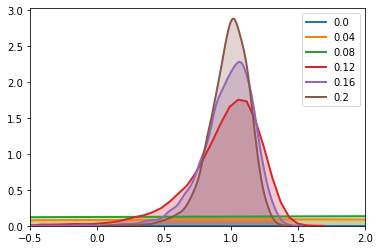

In [515]:
#(iii) Construct a 95% confidence interval for β based on the IV estimator.
# plt.figure(figsize = (12,6))
def ci_plot(variable, rvalue):
    for i in range(rvalue):
        print("r = " + str(i ) + "/25")
        ci = sm.stats.DescrStatsW(variable[i, ]).tconfint_mean()
        print(ci)
        
     
    for i in range(rvalue):
        
        sns.distplot(variable[i, ], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = i/25)
 
# ploting reference
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

ci_plot(biv, rvalue)
plt.xlim(-0.5, 2)


r = 0/25
(1.7998018367122437, 1.8007488972199919)
r = 1/25
(1.797165927246656, 1.798118367658276)
r = 2/25
(1.7894997222629523, 1.7904479436447303)
r = 3/25
(1.7769235647991533, 1.7778750865925277)
r = 4/25
(1.7605790271435189, 1.7615471600171686)
r = 5/25
(1.7405587095009285, 1.7415130616713295)


(1.7456781298334805, 1.8101184209114323)

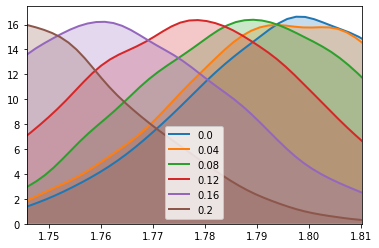

In [510]:

ci_plot(bols, rvalue)
plt.xlim(bols.mean() - bols.std(),  bols.mean() + bols.std())

r = 0/25
(-0.0007024224951509742, 0.0004159293542431076)
r = 1/25
(0.03917702303168455, 0.04029113524116311)
r = 2/25
(0.07984915578806955, 0.08096450637452614)
r = 3/25
(0.11928347673552891, 0.12038928172716204)
r = 4/25
(0.15971496107006408, 0.16080787215602235)
r = 5/25
(0.19957050623018283, 0.2006834730450828)


(0.02598321707598418, 0.1740909326337789)

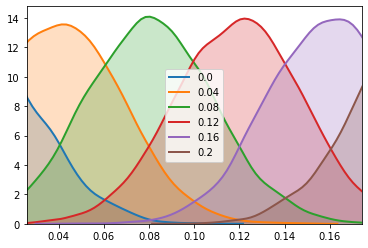

In [512]:
ci_plot(rhat, rvalue)
plt.xlim(rhat.mean() - rhat.std(),  rhat.mean() + rhat.std())

# **ans 2(a)**

gama = 0.040000
2. E[y^2] = 3.395393
3. E||x||^2 = 24.630246
4. E||z||^2 = 34.206410
5. E[z'z] = 0.874935
6. Rank(E[zx']) = 1.000000
7. E[ze] = -0.002473

gama = 0.080000
2. E[y^2] = 3.408379
3. E||x||^2 = 24.756450
4. E||z||^2 = 34.206410
5. E[z'z] = 0.874935
6. Rank(E[zx']) = 1.000000
7. E[ze] = -0.002473

gama = 0.120000
2. E[y^2] = 3.427356
3. E||x||^2 = 24.957141
4. E||z||^2 = 34.206410
5. E[z'z] = 0.874935
6. Rank(E[zx']) = 1.000000
7. E[ze] = -0.002473

gama = 0.160000
2. E[y^2] = 3.452325
3. E||x||^2 = 25.230541
4. E||z||^2 = 34.206410
5. E[z'z] = 0.874935
6. Rank(E[zx']) = 1.000000
7. E[ze] = -0.002473

gama = 0.200000
2. E[y^2] = 3.483284
3. E||x||^2 = 25.574319
4. E||z||^2 = 34.206410
5. E[z'z] = 0.874935
6. Rank(E[zx']) = 1.000000
7. E[ze] = -0.002473

1. assured by sampling method but we can plot and see the distribution


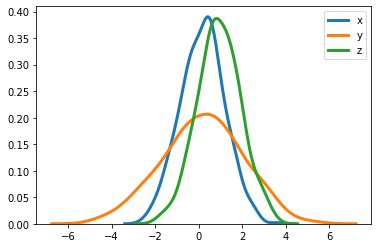

In [516]:
# assumption 1.2.
for i in range(rvalue):
    
    if i == 0:
        continue
    r = i /25
    np.random.seed(0)
    z = np.random.normal(1, 1, n)
    (e, v) = np.random.multivariate_normal([0, 0], [[1, 0.8], [0.8, 1]], n).T
    x = z * r +  v 
    y = beta * x + e

    x = x.reshape(-1, 1)
    z = z.reshape(-1, 1)
    e = e.reshape(-1, 1)
    v = v.reshape(-1, 1)
    y = y.reshape(-1, 1)


    ysq = np.power(y, 2).mean()
    xnorm = np.linalg.norm(x, 2)
    znorm = np.linalg.norm(z, 2)
    ezz = np.dot(z, z.T).mean()
    rankxz = np.linalg.matrix_rank(z.dot( x.T))
    eze = z.dot(e.T).mean()

    print("gama = %f"%r)
    print("2. E[y^2] = %f"%ysq)
    print("3. E||x||^2 = %f"%xnorm)
    print("4. E||z||^2 = %f"%znorm)
    print("5. E[z'z] = %f"%ezz)
    print("6. Rank(E[zx']) = %f"%rankxz)
    print("7. E[ze] = %f"%eze)
    print("")

print("1. assured by sampling method but we can plot and see the distribution")

sns.distplot(x, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "x")
sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "y")
sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "z")


# **ans 2(b)**

In [517]:
def property(variable, rvalue, truepar):
    for i in range(rvalue):
        print("r = " + str(i ) + "/25")
        mean = variable[i, ].mean()
        std = variable[i, ].std()
        mse = np.square(variable[i, ] - truepar).sum() / len(variable[i, ])
        print("mean, std, mse = %f, %f, %f"% (mean, std, mse) )
print("iv")        
property(biv, rvalue, beta)
print("\n")
print("ols")        
property(bols, rvalue, beta)

iv
r = 0/25
mean, std, mse = -11.429647, 1430.771185, 2047260.678579
r = 1/25
mean, std, mse = 1.277465, 28.067060, 787.836870
r = 2/25
mean, std, mse = 0.825245, 5.334605, 28.488553
r = 3/25
mean, std, mse = 0.941615, 0.315667, 0.103054
r = 4/25
mean, std, mse = 0.974638, 0.196633, 0.039308
r = 5/25
mean, std, mse = 0.983146, 0.150912, 0.023058


ols
r = 0/25
mean, std, mse = 1.800275, 0.024156, 0.641024
r = 1/25
mean, std, mse = 1.797642, 0.024293, 0.636823
r = 2/25
mean, std, mse = 1.789974, 0.024186, 0.624644
r = 3/25
mean, std, mse = 1.777399, 0.024270, 0.604939
r = 4/25
mean, std, mse = 1.761063, 0.024693, 0.579827
r = 5/25
mean, std, mse = 1.741036, 0.024342, 0.549727


# **ans 2(c)**


In [518]:
def ci_coverage(variable, rvalue):
    for i in range(rvalue):
        print("r = " + str(i ) + "/25")
        pr = variable[i, ].mean()
        print("coverage probabilities = %f" %pr)

ci_coverage(inci, rvalue)

r = 0/25
coverage probabilities = 0.757400
r = 1/25
coverage probabilities = 0.758000
r = 2/25
coverage probabilities = 0.758400
r = 3/25
coverage probabilities = 0.760000
r = 4/25
coverage probabilities = 0.764100
r = 5/25
coverage probabilities = 0.765700


# **ans 2(d)**

In [519]:
def f_ci(ci, r_f, rvalue):
    for i in range(rvalue):
        print("r = " + str(i) + "/25")
        select = r_f > 10
        ci_select = ci[i,  select[i, ]]
        pr = ci_select.mean()
        print("coverage probabilities = %f" %pr)
        
f_ci(inci, r_f, rvalue)

r = 0/25
coverage probabilities = 0.000000
r = 1/25
coverage probabilities = 0.167095
r = 2/25
coverage probabilities = 0.690051
r = 3/25
coverage probabilities = 0.808526
r = 4/25
coverage probabilities = 0.768998
r = 5/25
coverage probabilities = 0.765777


# **ans 2(e)**
if change repeat to 2500, the effect to distribution plots is easily observable. All the curve becomes less smooth and disperse. 
the result of 2(a) is mild, it makes sense since the data generating process should not be affected.
the effect to 2(b) is that the estimation becomes less distinct from ols results which implies that in smaller sample the benefit of using iv is less prominent.
the result of 2(c) remains roughly the same, while in 2(d) the probability of low rs slightly increase.
the result suggest iv estimator becomes more roboust as repeatition increase especially in the case of strong instrument is used; larger sample number is needed to reveal the consistency of its estimation, just as our derivation in class

